## NYPD - Motor Vehicles Collisions - Crashes : An Exploratory Data Analysis

### Description: 
The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage (https://www.nhtsa.gov/sites/nhtsa.dot.gov/files/documents/ny_overlay_mv-104an_rev05_2004.pdf). It should be noted that the data is preliminary and subject to change when the MV-104AN forms are amended based on revised crash details.

### [Dataset-Link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)

In [2]:
# Importing the necessary libraries for the analysis

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the collisions CSV file

nyc_mv_crashes = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv',parse_dates=['CRASH DATE'])

C:\Users\Pradeep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
#Checking the head of the dataset

nyc_mv_crashes.iloc[:,:12].head(6)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,2014-09-18,11:00,MANHATTAN,10065,40.761789,-73.957441,POINT (-73.9574405 40.7617894),EAST 64 STREET,YORK AVENUE,NaN,0.0,0.0
1,2014-10-09,17:30,BROOKLYN,11206,40.708171,-73.950658,POINT (-73.9506577 40.7081706),UNION AVENUE,SOUTH 3 STREET,NaN,1.0,0.0
2,2014-09-28,17:14,NaN,NaN,NaN,NaN,NaN,WEST 225 STREET,BROADWAY,NaN,0.0,0.0
3,2014-10-12,18:55,MANHATTAN,10029,40.797946,-73.940023,POINT (-73.9400231 40.7979463),EAST 116 STREET,3 AVENUE,NaN,0.0,0.0
4,2014-09-19,20:00,STATEN ISLAND,10312,40.546531,-74.180430,POINT (-74.1804303 40.5465306),ARDEN AVENUE,DRUMGOOLE ROAD EAST,NaN,0.0,0.0
5,2014-10-11,11:15,MANHATTAN,10016,40.747751,-73.980850,POINT (-73.9808504 40.7477508),EAST 35 STREET,PARK AVENUE,NaN,0.0,0.0


## nyc_mv_crashes.columns

In [36]:
# Replacing the spaces in column names with underscores

nyc_mv_crashes.columns = nyc_mv_crashes.columns.str.replace(' ','_')
nyc_mv_crashes.columns = nyc_mv_crashes.columns.str.title()

In [37]:
nyc_mv_crashes.head()

,Crash_Date,Crash_Time,Borough,Zip_Code,Latitude,Longitude,Location,On_Street_Name,Cross_Street_Name,Off_Street_Name,...,Contributing_Factor_Vehicle_2,Contributing_Factor_Vehicle_3,Contributing_Factor_Vehicle_4,Contributing_Factor_Vehicle_5,Collision_Id,Vehicle_Type_Code_1,Vehicle_Type_Code_2,Vehicle_Type_Code_3,Vehicle_Type_Code_4,Vehicle_Type_Code_5
0,2014-09-18,11:00,MANHATTAN,10065,40.761789,-73.957441,POINT (-73.9574405 40.7617894),EAST 64 STREET,YORK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,1026519,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1,2014-10-09,17:30,BROOKLYN,11206,40.708171,-73.950658,POINT (-73.9506577 40.7081706),UNION AVENUE,SOUTH 3 STREET,NaN,...,NaN,NaN,NaN,NaN,1036819,UNKNOWN,NaN,NaN,NaN,NaN
2,2014-09-28,17:14,NaN,NaN,NaN,NaN,NaN,WEST 225 STREET,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,1029798,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
3,2014-10-12,18:55,MANHATTAN,10029,40.797946,-73.940023,POINT (-73.9400231 40.7979463),EAST 116 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,1037524,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
4,2014-09-19,20:00,STATEN ISLAND,10312,40.546531,-74.180430,POINT (-74.1804303 40.5465306),ARDEN AVENUE,DRUMGOOLE ROAD EAST,NaN,...,Unspecified,NaN,NaN,NaN,1031498,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN


In [38]:
# Checking the shape of the dataset

nyc_mv_collisions_shape = nyc_mv_crashes.shape
print(nyc_mv_collisions_shape)

(1630835, 29)


In [39]:
#Checking the missing values in each column

missing_count = pd.isna(nyc_mv_crashes).sum().reset_index()
missing_count['pct'] = [round(100*x/nyc_mv_collisions_shape[0],2) for x in missing_count[0]]
missing_count

,index,0,pct
0,Crash_Date,0,0.00
1,Crash_Time,0,0.00
2,Borough,495680,30.39
3,Zip_Code,495881,30.41
4,Latitude,198435,12.17
5,Longitude,198435,12.17
6,Location,198435,12.17
7,On_Street_Name,320512,19.65
8,Cross_Street_Name,549814,33.71
9,Off_Street_Name,1402488,86.00


It can be seen that a few columns have a lot of missing values, while some columns such as collision date, time, id, and numbers have no missing values. For the analysis, let's consider only columns tht have missing values no more than 50%

In [69]:
# Getting the columns with missing values more than 50% in a list

missing_counts_high = list(missing_count[missing_count.pct >50]['index'])
missing_counts_high

['Off_Street_Name',
 'Contributing_Factor_Vehicle_3',
 'Contributing_Factor_Vehicle_4',
 'Contributing_Factor_Vehicle_5',
 'Vehicle_Type_Code_3',
 'Vehicle_Type_Code_4',
 'Vehicle_Type_Code_5']

In [72]:
# Dropping the above columns

nyc_mv_crashes_1 = nyc_mv_crashes.drop(columns = missing_counts_high)
print(nyc_mv_crashes_1.shape)
nyc_mv_crashes_1.head()

(1630835, 22)


,Crash_Date,Crash_Time,Borough,Zip_Code,Latitude,Longitude,Location,On_Street_Name,Cross_Street_Name,Number_Of_Persons_Injured,...,Number_Of_Pedestrians_Killed,Number_Of_Cyclist_Injured,Number_Of_Cyclist_Killed,Number_Of_Motorist_Injured,Number_Of_Motorist_Killed,Contributing_Factor_Vehicle_1,Contributing_Factor_Vehicle_2,Collision_Id,Vehicle_Type_Code_1,Vehicle_Type_Code_2
0,2014-09-18,11:00,MANHATTAN,10065,40.761789,-73.957441,POINT (-73.9574405 40.7617894),EAST 64 STREET,YORK AVENUE,0.0,...,0,0,0,0,0,Unspecified,Unspecified,1026519,PASSENGER VEHICLE,UNKNOWN
1,2014-10-09,17:30,BROOKLYN,11206,40.708171,-73.950658,POINT (-73.9506577 40.7081706),UNION AVENUE,SOUTH 3 STREET,1.0,...,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,1036819,UNKNOWN,NaN
2,2014-09-28,17:14,NaN,NaN,NaN,NaN,NaN,WEST 225 STREET,BROADWAY,0.0,...,0,0,0,0,0,Unspecified,Unspecified,1029798,PASSENGER VEHICLE,TAXI
3,2014-10-12,18:55,MANHATTAN,10029,40.797946,-73.940023,POINT (-73.9400231 40.7979463),EAST 116 STREET,3 AVENUE,0.0,...,0,0,0,0,0,Lost Consciousness,Unspecified,1037524,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
4,2014-09-19,20:00,STATEN ISLAND,10312,40.546531,-74.180430,POINT (-74.1804303 40.5465306),ARDEN AVENUE,DRUMGOOLE ROAD EAST,0.0,...,0,0,0,0,0,Other Vehicular,Unspecified,1031498,PASSENGER VEHICLE,UNKNOWN


In [215]:
#Getting the value_counts of Boroughs

nyc_mv_crashes_1.Borough.value_counts(dropna=False)

NaN              495680
BROOKLYN         352825
QUEENS           302951
MANHATTAN        271826
BRONX            158646
STATEN ISLAND     48907
Name: Borough, dtype: int64

As observed, NaNs comprise ~30% of the records followed by Brooklyn and Queens.We can use the lat-long info for the records with missing Borough and zip-codes and use reverse geocoding to reduce the NaNs 

In [166]:
#Creating a csv copy of the updated dataset

nyc_mv_crashes_1.to_csv('nyc_mv_crashes.csv',index=False)

###  Reverse geocoding to obtain the Borough info for missing recrods

In [138]:
# Importing the geopy package

from arcgis.gis import GIS
from arcgis.geocoding import reverse_geocode

In [109]:
#Filtering for records where lat-long info is available and borough,zip code details are missing:

lat_long_w_missing_borough = nyc_mv_crashes_1[(nyc_mv_crashes_1.Borough.isna()) & 
                                              (~nyc_mv_crashes_1.Location.isna())].reset_index()

In [144]:
lat_long_w_missing_borough.drop(columns='index',inplace=True)
print(lat_long_w_missing_borough.shape)

(326377, 22)


In [189]:
# Function to get the address details for a given lat-long pair

def get_address(df):
    try:
        location = reverse_geocode([df.Longitude,df.Latitude])
        df['Zip_code'] = location['address']['Postal']
        df['County'] = location['address']['Subregion']
        return df
    except RuntimeError:
        df['Zip_code'] = np.NaN
        df['County'] = np.NaN
        return df

In [162]:
#Dropping duplicates at lat-long pair level for reverse geocoding

lat_long_missing_unique = lat_long_w_missing_borough.drop_duplicates(subset=['Latitude','Longitude']).reset_index()

In [202]:
#Applying the get_address function to the unique lat-long pairs

lat_long_missing_unique_1 = lat_long_missing_unique.apply(get_address,axis=1)

Cannot perform query. Invalid query parameters.
Unable to find address for the specified location.
Cannot perform query. Invalid query parameters.
Unable to find address for the specified location.
Cannot perform query. Invalid query parameters.
Unable to find address for the specified location.
Cannot perform query. Invalid query parameters.
Unable to find address for the specified location.


In [203]:
lat_long_missing_unique_1.head()

,index,Crash_Date,Crash_Time,Borough,Zip_Code,Latitude,Longitude,Location,On_Street_Name,Cross_Street_Name,...,Number_Of_Cyclist_Killed,Number_Of_Motorist_Injured,Number_Of_Motorist_Killed,Contributing_Factor_Vehicle_1,Contributing_Factor_Vehicle_2,Collision_Id,Vehicle_Type_Code_1,Vehicle_Type_Code_2,Zip_code,County
0,0,2014-10-06,7:10,NaN,NaN,40.740693,-73.844170,POINT (-73.8441704 40.7406926),NaN,NaN,...,0,0,0,Fatigued/Drowsy,Unspecified,3066544,SPORT UTILITY / STATION WAGON,LARGE COM VEH(6 OR MORE TIRES),11355,Queens County
1,1,2014-10-08,10:00,NaN,NaN,40.733687,-73.923950,POINT (-73.92395 40.7336872),NaN,NaN,...,0,0,0,Driver Inattention/Distraction,Unspecified,3046903,LIVERY VEHICLE,LIVERY VEHICLE,11378,Queens County
2,2,2014-09-27,11:37,NaN,NaN,40.714109,-73.953205,POINT (-73.9532051 40.7141086),NaN,NaN,...,0,0,0,Other Vehicular,Fatigued/Drowsy,2988777,PASSENGER VEHICLE,TAXI,11211,Kings County
3,3,2019-12-30,13:00,NaN,NaN,40.736390,-73.909720,POINT (-73.90972 40.73639),BROOKLYN QUEENS EXPRESSWAY,NaN,...,0,1,0,Unsafe Speed,NaN,4266617,Sedan,NaN,11377,Queens County
4,4,2014-09-19,20:05,NaN,NaN,40.760707,-73.858238,POINT (-73.858238 40.7607067),NaN,NaN,...,0,0,0,Unspecified,Unspecified,3107604,PASSENGER VEHICLE,PASSENGER VEHICLE,11369,Queens County


In [204]:
#Creating a csv copy of the geocoded lat-long pairs

lat_long_missing_unique_1.to_csv('lat_long_missing_unique_upd.csv',index=False)

In [224]:
#Merging the dataset back with the nyc_mv_crashes_1 dataet

nyc_mv_crashes_upd = nyc_mv_crashes_1.merge(lat_long_missing_unique_1[['Latitude', 'Longitude','Zip_code', 'County']],
                                                              on=['Latitude','Longitude'],
                                                              how='left')

In [228]:
nyc_mv_crashes_upd.shape

(1630835, 24)

In [219]:
# Funtion to update the Borough and Zip code info.
'''
If the borough is in one of the five counties - 
Broox, Kings, New York, Queens and Richmond, we update them, else we leave them as NaNs
'''
def update_borough(df):
    if df.County == 'Bronx County':
        df.Borough = 'BRONX'
        df.Zip_Code = df.Zip_code
    elif df.County == 'Kings County':
        df.Borough = 'BROOKLYN'
        df.Zip_Code = df.Zip_code
    elif df.County == 'New York County':
        df.Borough = 'MANHATTAN'
        df.Zip_Code = df.Zip_code
    elif df.County == 'Queens County':
        df.Borough = 'QUEENS'
        df.Zip_Code = df.Zip_code
    elif df.County == 'Richmond County':
        df.Borough = 'STATEN ISLAND'
        df.Zip_Code = df.Zip_code
    return df

In [229]:
nyc_mv_crashes_upd = nyc_mv_crashes_upd.apply(update_borough,axis = 1)

In [230]:
nyc_mv_crashes_upd.Borough.value_counts(dropna=False)

BROOKLYN         431823
QUEENS           415871
MANHATTAN        333643
BRONX            207783
NaN              169894
STATEN ISLAND     71821
Name: Borough, dtype: int64

In [231]:
#Checking the missing values % for the updated dataset

missing_count = pd.isna(nyc_mv_crashes_upd).sum().reset_index()
missing_count['pct'] = [round(100*x/nyc_mv_crashes_upd.shape[0],2) for x in missing_count[0]]
missing_count

,index,0,pct
0,Crash_Date,0,0.00
1,Crash_Time,0,0.00
2,Borough,169894,10.42
3,Zip_Code,170009,10.42
4,Latitude,198435,12.17
5,Longitude,198435,12.17
6,Location,198435,12.17
7,On_Street_Name,320512,19.65
8,Cross_Street_Name,549814,33.71
9,Number_Of_Persons_Injured,17,0.00


In [ ]:
nyc_mv_crashes_upd['Number_Of_Persons_Injured'] = nyc_mv_crashes_upd['Number_Of_Persons_Injured'].fillna(value=0)

In [251]:
#Dropping redundant columns from the dataset

nyc_mv_crashes_upd.drop(columns =['Zip_code','County'],inplace = True)

We have reduced NaNs in the Boroughs from 30% to ~10%!.The Boroughs now capture 90% of the collisions over the given time period

In [249]:
#Adding derived features such as day of the week, weekday, month of the year etc..

nyc_mv_crashes_upd['crash_day'] = nyc_mv_crashes_upd['Crash_Date'].dt.day
nyc_mv_crashes_upd['crash_weekday'] = nyc_mv_crashes_upd['Crash_Date'].dt.weekday
nyc_mv_crashes_upd['crash_weekday_name'] = nyc_mv_crashes_upd['Crash_Date'].dt.weekday_name
nyc_mv_crashes_upd['crash_month'] = nyc_mv_crashes_upd['Crash_Date'].dt.month
nyc_mv_crashes_upd['crash_year'] = nyc_mv_crashes_upd['Crash_Date'].dt.year

In [257]:
#Updating NaNs as 'Unknown' in the Borough column

unknown = {'Borough':'UNKNOWN'}
nyc_mv_crashes_upd.fillna(value = unknown,inplace= True)

In [291]:
#Checking the min and max dates for each year

nyc_mv_crashes_upd.pivot_table(index = 'Borough', columns ='crash_year',
                               values='Crash_Date',aggfunc=[np.min,np.max],dropna=False).reset_index()

Borough       amin                                   \
crash_year                      2012       2013       2014       2015   
0                   BRONX 2012-07-01 2013-01-01 2014-01-01 2015-01-01   
1                BROOKLYN 2012-07-01 2013-01-01 2014-01-01 2015-01-01   
2               MANHATTAN 2012-07-01 2013-01-01 2014-01-01 2015-01-01   
3                  QUEENS 2012-07-01 2013-01-01 2014-01-01 2015-01-01   
4           STATEN ISLAND 2012-07-01 2013-01-01 2014-01-01 2015-01-01   
5                 UNKNOWN 2012-07-01 2013-01-01 2014-01-01 2015-01-01   

                                                             amax             \
crash_year       2016       2017       2018       2019       2012       2013   
0          2016-01-01 2017-01-01 2018-01-01 2019-01-01 2012-12-31 2013-12-31   
1          2016-01-01 2017-01-01 2018-01-01 2019-01-01 2012-12-31 2013-12-31   
2          2016-01-01 2017-01-01 2018-01-01 2019-01-01 2012-12-31 2013-12-31   
3          2016-01-01 2017-01-01 2018-01-01 2019-01-01 2012-12-31 2013-12-31   
4          2016-01-01 2017-01-01 2018-01-01 2019-01-01 2012-12-31 2013-12-31   
5          2016-01-01 2017-01-01 2018-01-01 2019-01-01 2012-12-31 2013-12-31   

                                                                              
crash_year       2014       2015       2016       2017       2018       2019  
0          2014-12-31 2015-12-31 2016-12-31 2017-12-31 2018-12-31 2019-12-30  
1          2014-12-31 2015-12-31 2016-12-31 2017-12-31 2018-12-31 2019-12-30  
2          2014-12-31 2015-12-31 2016-12-31 2017-12-31 2018-12-31 2019-12-30  
3          2014-12-31 2015-12-31 2016-12-31 2017-12-31 2018-12-31 2019-12-30  
4          2014-12-31 2015-12-31 2016-12-31 2017-12-31 2018-12-31 2019-12-30  
5          2014-12-31 2015-12-31 2016-12-31 2017-12-31 2018-12-31 2019-12-30

Since we have only 6 months of data in 2012, we will drop this year from our analysis

In [295]:
nyc_mv_crashes_final = nyc_mv_crashes_upd[nyc_mv_crashes_upd.crash_year > 2012]
print(nyc_mv_crashes_final.shape,nyc_mv_crashes_upd.shape)

(1530294, 27) (1630835, 27)


In [381]:
time_hour = []
for rows in nyc_mv_crashes_final.itertuples():
    time = datetime.datetime.strptime(rows.Crash_Time,"%H:%M").hour
    time_hour.append(time)
print(len(time_hour))

1530294


In [382]:
nyc_mv_crashes_final['crash_time_hour'] = time_hour

C:\Users\Pradeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [385]:
nyc_mv_crashes_final.head(5)

,Crash_Date,Crash_Time,Borough,Zip_Code,Latitude,Longitude,Location,On_Street_Name,Cross_Street_Name,Number_Of_Persons_Injured,...,Contributing_Factor_Vehicle_2,Collision_Id,Vehicle_Type_Code_1,Vehicle_Type_Code_2,crash_day,crash_weekday,crash_month,crash_year,crash_weekday_name,crash_time_hour
0,2014-09-18,11:00,MANHATTAN,10065,40.761789,-73.957441,POINT (-73.9574405 40.7617894),EAST 64 STREET,YORK AVENUE,0.0,...,Unspecified,1026519,PASSENGER VEHICLE,UNKNOWN,18,3,9,2014,Thursday,11
1,2014-10-09,17:30,BROOKLYN,11206,40.708171,-73.950658,POINT (-73.9506577 40.7081706),UNION AVENUE,SOUTH 3 STREET,1.0,...,NaN,1036819,UNKNOWN,NaN,9,3,10,2014,Thursday,17
2,2014-09-28,17:14,UNKNOWN,NaN,NaN,NaN,NaN,WEST 225 STREET,BROADWAY,0.0,...,Unspecified,1029798,PASSENGER VEHICLE,TAXI,28,6,9,2014,Sunday,17
3,2014-10-12,18:55,MANHATTAN,10029,40.797946,-73.940023,POINT (-73.9400231 40.7979463),EAST 116 STREET,3 AVENUE,0.0,...,Unspecified,1037524,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,12,6,10,2014,Sunday,18
4,2014-09-19,20:00,STATEN ISLAND,10312,40.546531,-74.180430,POINT (-74.1804303 40.5465306),ARDEN AVENUE,DRUMGOOLE ROAD EAST,0.0,...,Unspecified,1031498,PASSENGER VEHICLE,UNKNOWN,19,4,9,2014,Friday,20


### Exploratory Analysis through plots

In [354]:
#Function to generate line plots for the given dimensions and measures

def lineplots(data,groupby_rows,metric,x_axis,y_axis,xlabel,ylabel,variable = None,axis_ticks_size = 12,axis_label_size=12,Title = None,Title_size=15):
    plt.figure(figsize=(18,8))
    # plt.subplot(2,1,1)
    data=data.groupby(groupby_rows,as_index=False)[metric].count()
    sns.lineplot(data = data, x = x_axis, y = y_axis,hue = variable, markers= True,style = variable, size = variable)
    plt.xlabel(xlabel,fontsize=axis_label_size)
    plt.ylabel(ylabel,fontsize=axis_label_size)
    plt.xticks(fontsize=axis_ticks_size)
    plt.yticks(fontsize=axis_ticks_size)
    plt.title(Title,fontsize=Title_size)

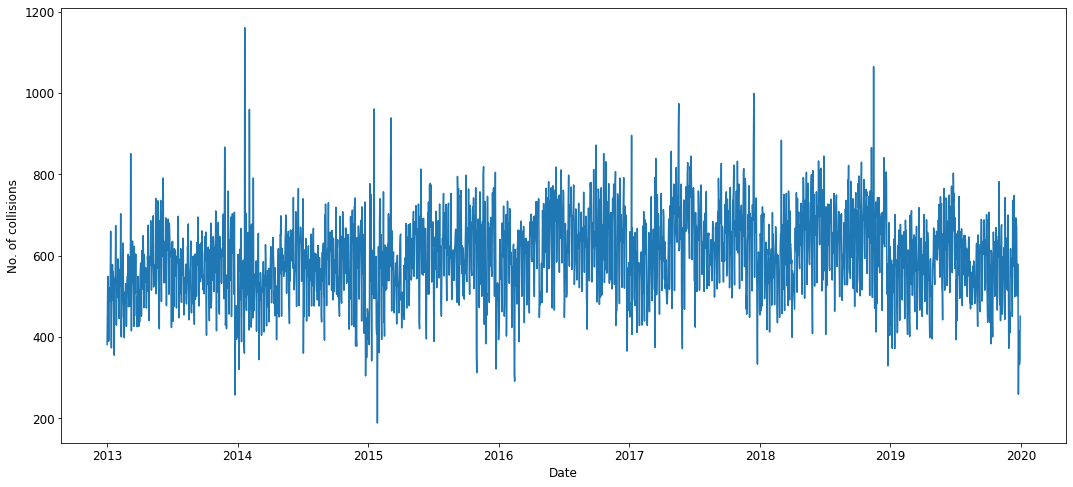

In [403]:
# Overall Trend

lineplots(data=nyc_mv_crashes_final,groupby_rows=['Crash_Date'],metric= 'Collision_Id',
          x_axis='Crash_Date',y_axis='Collision_Id',xlabel='Date',ylabel='No. of collisions')

(100000, 250000)

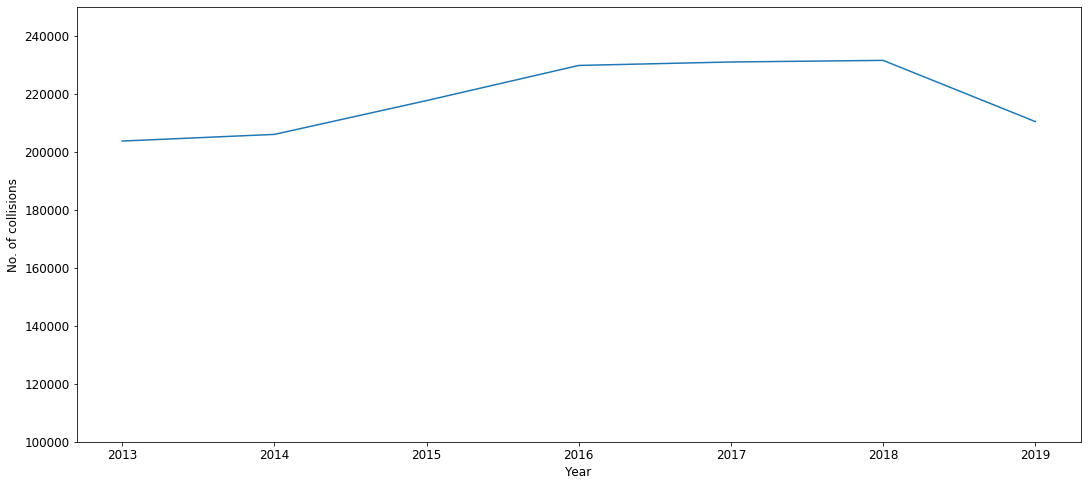

In [402]:
lineplots(data=nyc_mv_crashes_final,groupby_rows=['crash_year'],metric= 'Collision_Id',
          x_axis='crash_year',y_axis='Collision_Id',xlabel='Year',ylabel='No. of collisions')
plt.ylim(100000,250000)


Overall, the number of traffic collisions in NYC has been steadily increasing over the years with the exception of the year 2019. There is a seasonality in the trend with the collisions peaking in the summer months and then during the winter.With access to vehicles becoming more affordable with time, it is expected to see an increase in the number of vehicles and that could be a reason for the trend

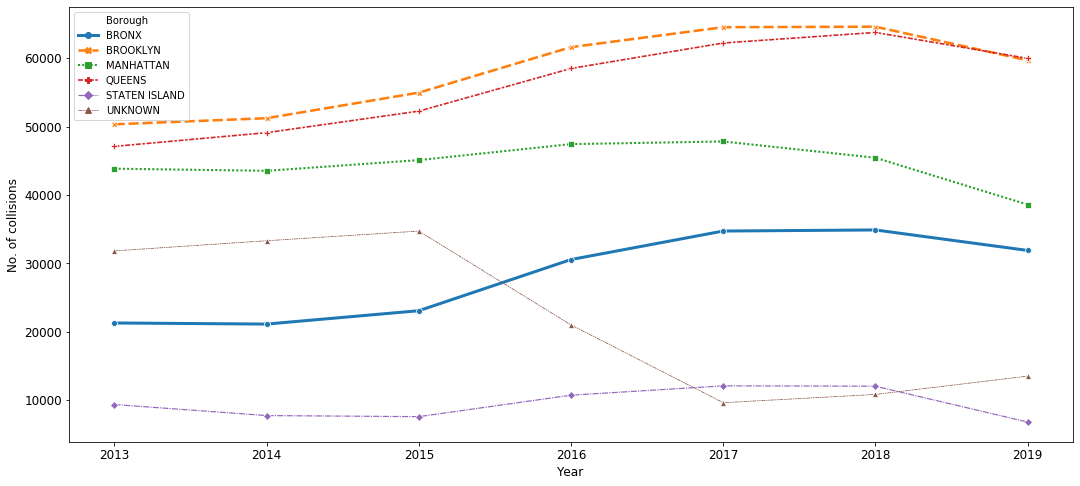

In [356]:
# Number of collisions - Yearly trend by boroughs

lineplots(data=nyc_mv_crashes_final,groupby_rows=['Borough','crash_year'],metric= 'Collision_Id',
          x_axis='crash_year',y_axis='Collision_Id',variable='Borough',xlabel='Year',ylabel='No. of collisions')

In [ ]:
Brooklyn has the highest number of collisions across the years, followed by Queens and Manhattan

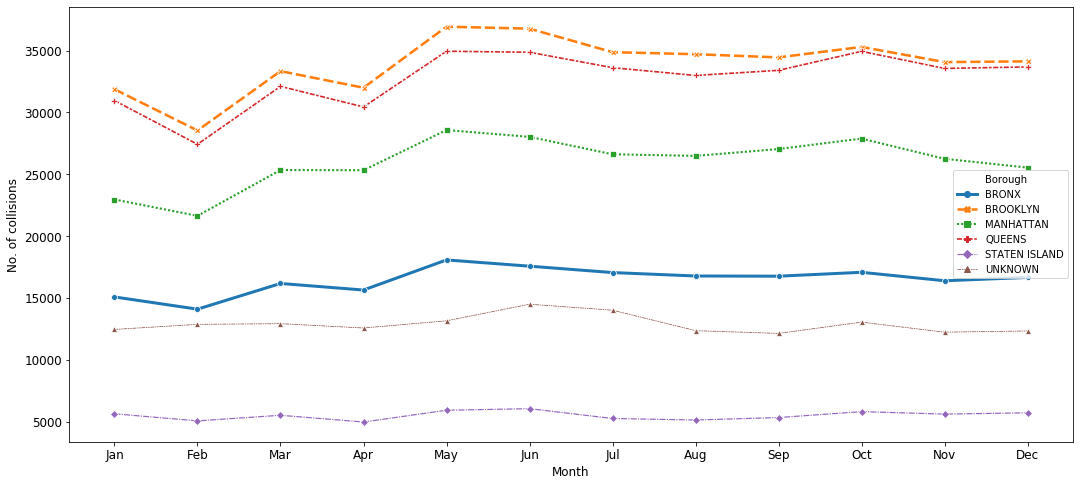

In [397]:
#Number of collisions by month of the year

lineplots(data=nyc_mv_crashes_final,groupby_rows=['Borough','crash_month'],metric= 'Collision_Id',
          x_axis='crash_month',y_axis='Collision_Id',variable='Borough',xlabel='Month',ylabel='No. of collisions');
plt.xticks(np.sort(nyc_mv_crashes_final.crash_month.unique()),
           ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'));

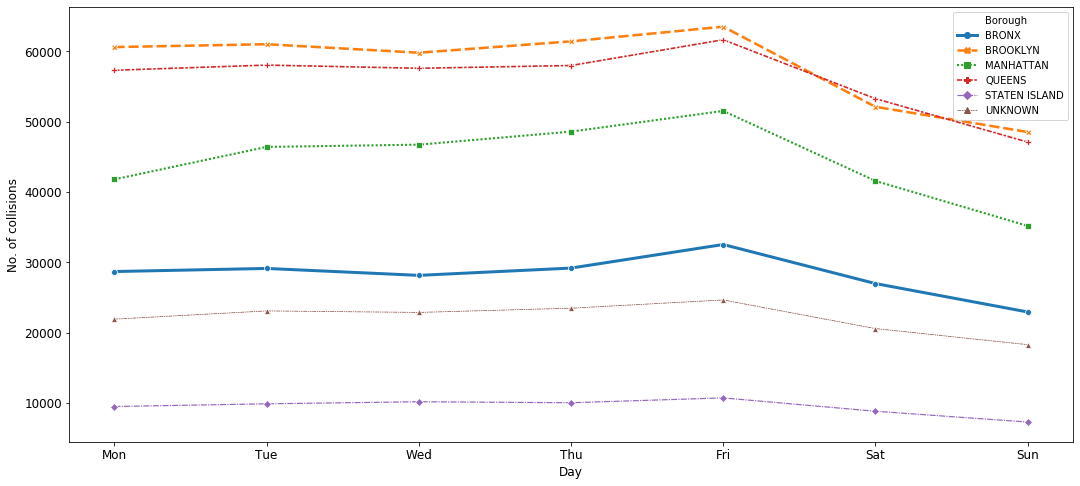

In [399]:
#Number of collisions by day of the week

lineplots(data=nyc_mv_crashes_final,groupby_rows=['Borough','crash_weekday'],metric= 'Collision_Id',
          x_axis='crash_weekday',y_axis='Collision_Id',variable='Borough',xlabel='Day',ylabel='No. of collisions')
plt.xticks(np.sort(nyc_mv_crashes_final.crash_weekday.unique()),
           ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'));

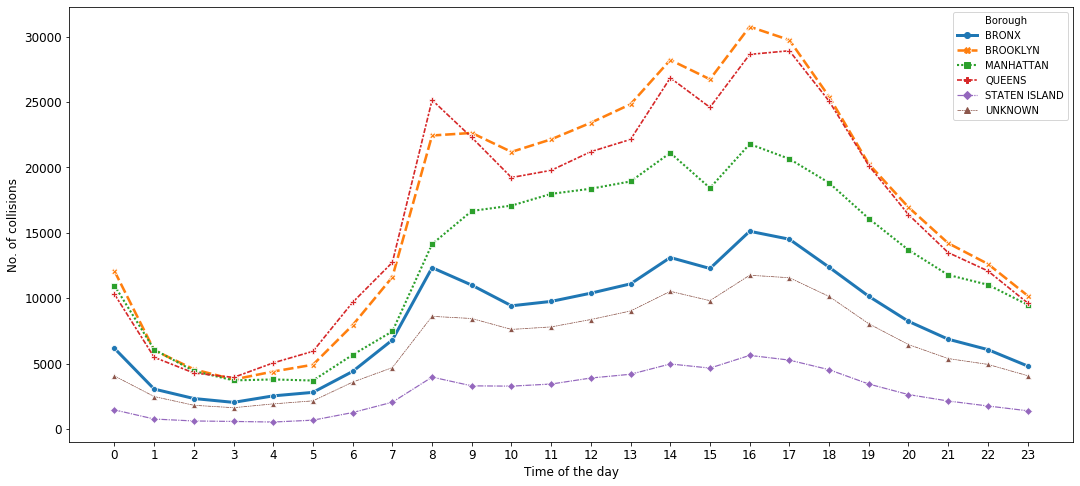

In [398]:
#Number of collisions by time of the day

lineplots(data=nyc_mv_crashes_final,groupby_rows=['Borough','crash_time_hour'],metric= 'Collision_Id',
          x_axis='crash_time_hour',y_axis='Collision_Id',variable='Borough',xlabel='Time of the day',ylabel='No. of collisions')
plt.xticks(np.sort(nyc_mv_crashes_final.crash_time_hour.unique()));

In [404]:
# Exporting the dataset for exploratory visual analysis in Tableau:

nyc_mv_crashes_final.to_csv('nyc_mv_crashes_final.csv',index=False)

In [415]:
#Filtering for 2018 and 2019 data to do a deep-dive to understand the cause for the spike in Fatality rates in Brooklyn:

nyc_mv_crashes_2018_19 = nyc_mv_crashes_final[nyc_mv_crashes_final.crash_year >=2018]

In [416]:
nyc_mv_crashes_2018_19.head()

,Crash_Date,Crash_Time,Borough,Zip_Code,Latitude,Longitude,Location,On_Street_Name,Cross_Street_Name,Number_Of_Persons_Injured,...,Contributing_Factor_Vehicle_2,Collision_Id,Vehicle_Type_Code_1,Vehicle_Type_Code_2,crash_day,crash_weekday,crash_month,crash_year,crash_weekday_name,crash_time_hour
24,2019-12-30,0:29,UNKNOWN,NaN,NaN,NaN,NaN,HARLEM RIVER DRIVE RAMP,NaN,0.0,...,Unspecified,4267427,Sedan,Sedan,30,0,12,2019,Monday,0
74,2019-12-30,13:00,QUEENS,11377,40.73639,-73.90972,POINT (-73.90972 40.73639),BROOKLYN QUEENS EXPRESSWAY,NaN,1.0,...,NaN,4266617,Sedan,NaN,30,0,12,2019,Monday,13
97,2018-07-10,22:55,UNKNOWN,NaN,NaN,NaN,NaN,WEST 22 STREET,12 AVENUE,3.0,...,Unspecified,3941203,Taxi,Motorcycle,10,1,7,2018,Tuesday,22
150,2019-12-30,15:10,UNKNOWN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,Shore road,0.0,...,Unspecified,4267636,Sedan,Station Wagon/Sport Utility Vehicle,30,0,12,2019,Monday,15
223,2019-12-30,18:02,UNKNOWN,NaN,NaN,NaN,NaN,VERRAZANO BRIDGE UPPER,NaN,0.0,...,Unspecified,4266884,Sedan,Sedan,30,0,12,2019,Monday,18


In [418]:
nyc_mv_crashes_2018_19.shape

(442011, 28)

In [420]:
nyc_mv_crashes_2018_19.to_csv('nyc_mv_crashes_2018_19.csv',index= False)

In [424]:
agg_dict = {'Number_Of_Persons_Killed':'sum','Number_Of_Cyclist_Killed':'sum',
           'Number_Of_Pedestrians_Killed':'sum','Number_Of_Motorist_Killed':'sum'}

In [15]:
nyc_mv_crashes_2018_19 = pd.read_csv('nyc_mv_crashes_2018_19.csv')

In [19]:
nyc_mv_crashes_2018_19.head()

,Crash_Date,Crash_Time,Borough,Zip_Code,Latitude,Longitude,Location,On_Street_Name,Cross_Street_Name,Number_Of_Persons_Injured,...,Contributing_Factor_Vehicle_2,Collision_Id,Vehicle_Type_Code_1,Vehicle_Type_Code_2,crash_day,crash_weekday,crash_month,crash_year,crash_weekday_name,crash_time_hour
0,2019-12-30,0:29,UNKNOWN,NaN,NaN,NaN,NaN,HARLEM RIVER DRIVE RAMP,NaN,0.0,...,Unspecified,4267427,Sedan,Sedan,30,0,12,2019,Monday,0
1,2019-12-30,13:00,QUEENS,11377.0,40.73639,-73.90972,POINT (-73.90972 40.73639),BROOKLYN QUEENS EXPRESSWAY,NaN,1.0,...,NaN,4266617,Sedan,NaN,30,0,12,2019,Monday,13
2,2018-07-10,22:55,UNKNOWN,NaN,NaN,NaN,NaN,WEST 22 STREET,12 AVENUE,3.0,...,Unspecified,3941203,Taxi,Motorcycle,10,1,7,2018,Tuesday,22
3,2019-12-30,15:10,UNKNOWN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,Shore road,0.0,...,Unspecified,4267636,Sedan,Station Wagon/Sport Utility Vehicle,30,0,12,2019,Monday,15
4,2019-12-30,18:02,UNKNOWN,NaN,NaN,NaN,NaN,VERRAZANO BRIDGE UPPER,NaN,0.0,...,Unspecified,4266884,Sedan,Sedan,30,0,12,2019,Monday,18


In [21]:
#Filtering for 2019 data to model the fatalities and injuries given a collision

nyc_mv_crashes_19 = nyc_mv_crashes_2018_19[(nyc_mv_crashes_2018_19.Crash_Date >'2018-10-01 00:00:00')]

In [22]:
nyc_mv_crashes_19.shape

(269625, 28)

In [23]:
nyc_mv_crashes_19.columns

Index(['Crash_Date', 'Crash_Time', 'Borough', 'Zip_Code', 'Latitude',
       'Longitude', 'Location', 'On_Street_Name', 'Cross_Street_Name',
       'Number_Of_Persons_Injured', 'Number_Of_Persons_Killed',
       'Number_Of_Pedestrians_Injured', 'Number_Of_Pedestrians_Killed',
       'Number_Of_Cyclist_Injured', 'Number_Of_Cyclist_Killed',
       'Number_Of_Motorist_Injured', 'Number_Of_Motorist_Killed',
       'Contributing_Factor_Vehicle_1', 'Contributing_Factor_Vehicle_2',
       'Collision_Id', 'Vehicle_Type_Code_1', 'Vehicle_Type_Code_2',
       'crash_day', 'crash_weekday', 'crash_month', 'crash_year',
       'crash_weekday_name', 'crash_time_hour'],
      dtype='object')

In [24]:
nyc_mv_crashes_19['Is_injury'] = np.where(nyc_mv_crashes_19.Number_Of_Persons_Injured >0,1,0)
nyc_mv_crashes_19['Is_fatality'] = np.where(nyc_mv_crashes_19.Number_Of_Persons_Killed >0,1,0)
nyc_mv_crashes_19['Is_weekend'] = np.where(nyc_mv_crashes_19.crash_weekday >4,1,0)

C:\Users\Pradeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pradeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pradeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [25]:
# Getting the dummies for some of the key categorical variables

nyc_mv_crashes_19_wide = pd.get_dummies(data=nyc_mv_crashes_19, 
                                        columns= ['Contributing_Factor_Vehicle_1','Vehicle_Type_Code_1'],prefix=['F','V'])

In [26]:
nyc_factor_summary = nyc_mv_crashes_19.groupby(by='Contributing_Factor_Vehicle_1',
                          as_index=False).Is_injury.sum().sort_values('Is_injury',ascending = False).reset_index()

In [27]:
nyc_v_type_summary = nyc_mv_crashes_19.groupby(by='Vehicle_Type_Code_1',
                          as_index=False).Is_injury.sum().sort_values('Is_injury',
                                                                      ascending = False).reset_index()

In [28]:
least_impt_factors = []
most_impt_factors = []
for rows in nyc_factor_summary.itertuples():
    if rows.Is_injury < 500:
#         factor = 'F_' + rows.Contributing_Factor_Vehicle_1
        least_impt_factors.append('F_' + rows.Contributing_Factor_Vehicle_1)
    else:
        most_impt_factors.append('F_' + rows.Contributing_Factor_Vehicle_1)
# print(least_impt_factors)
print('\n',most_impt_factors)


 ['F_Driver Inattention/Distraction', 'F_Unspecified', 'F_Failure to Yield Right-of-Way', 'F_Following Too Closely', 'F_Traffic Control Disregarded', 'F_Unsafe Speed', 'F_Other Vehicular', 'F_Passing or Lane Usage Improper', 'F_Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'F_Backing Unsafely', 'F_Unsafe Lane Changing', 'F_Turning Improperly', 'F_Reaction to Uninvolved Vehicle', 'F_Alcohol Involvement', 'F_Driver Inexperience', 'F_Pavement Slippery', 'F_View Obstructed/Limited', 'F_Passing Too Closely']


In [29]:
least_impt_v_types = []
most_impt_v_types = []
for rows in nyc_v_type_summary.itertuples():
    if rows.Is_injury < 100:
#         factor = 'F_' + rows.Contributing_Factor_Vehicle_1
        least_impt_v_types.append('V_' + rows.Vehicle_Type_Code_1)
    else:
        most_impt_v_types.append('V_' + rows.Vehicle_Type_Code_1)
# print(least_impt_v_types)
print('\n',most_impt_v_types)


 ['V_Sedan', 'V_Station Wagon/Sport Utility Vehicle', 'V_Taxi', 'V_Bike', 'V_Pick-up Truck', 'V_Bus', 'V_Motorcycle', 'V_Box Truck', 'V_Van', 'V_Tractor Truck Diesel', 'V_Convertible', 'V_E-Sco', 'V_Dump']


In [30]:
nyc_mv_crashes_19_wide = nyc_mv_crashes_19_wide.drop(columns=least_impt_factors)

In [31]:
nyc_mv_crashes_19_wide = nyc_mv_crashes_19_wide.drop(columns=least_impt_v_types)

In [32]:
nyc_mv_crashes_19_wide = pd.get_dummies(nyc_mv_crashes_19_wide,columns =['Borough'],prefix = 'Borough')

In [33]:
nyc_mv_crashes_19_wide.groupby('Is_injury').Collision_Id.count().reset_index()

,Is_injury,Collision_Id
0,0,212729
1,1,56896


In [34]:
nyc_mv_crashes_19_wide.columns

Index(['Crash_Date', 'Crash_Time', 'Zip_Code', 'Latitude', 'Longitude',
       'Location', 'On_Street_Name', 'Cross_Street_Name',
       'Number_Of_Persons_Injured', 'Number_Of_Persons_Killed',
       'Number_Of_Pedestrians_Injured', 'Number_Of_Pedestrians_Killed',
       'Number_Of_Cyclist_Injured', 'Number_Of_Cyclist_Killed',
       'Number_Of_Motorist_Injured', 'Number_Of_Motorist_Killed',
       'Contributing_Factor_Vehicle_2', 'Collision_Id', 'Vehicle_Type_Code_2',
       'crash_day', 'crash_weekday', 'crash_month', 'crash_year',
       'crash_weekday_name', 'crash_time_hour', 'Is_injury', 'Is_fatality',
       'Is_weekend', 'F_Alcohol Involvement', 'F_Backing Unsafely',
       'F_Driver Inattention/Distraction', 'F_Driver Inexperience',
       'F_Failure to Yield Right-of-Way', 'F_Following Too Closely',
       'F_Other Vehicular', 'F_Passing Too Closely',
       'F_Passing or Lane Usage Improper', 'F_Pavement Slippery',
       'F_Pedestrian/Bicyclist/Other Pedestrian Error/Confu

In [35]:
nyc_mv_crashes_19_wide['F_others'] = 1 - nyc_mv_crashes_19_wide.loc[:,'F_Alcohol Involvement':'F_Unspecified'].sum(axis=1)
nyc_mv_crashes_19_wide['V_others'] = 1 - nyc_mv_crashes_19_wide.loc[:,'V_Bike':'V_Van'].sum(axis=1)

In [36]:
month_group = []
for rows in nyc_mv_crashes_19_wide.itertuples():
    if rows.crash_month <=2 or rows.crash_month == 12:
        month = 'Winter'
    elif 3 <= rows.crash_month <= 5:
        month = 'Spring'
    elif 6 <= rows.crash_month <= 8:
        month = 'Summer'
    else:
        month = 'Fall'
    month_group.append(month)

In [37]:
nyc_mv_crashes_19_wide['month_group'] = month_group

In [38]:
time_group = []
for rows in nyc_mv_crashes_19_wide.itertuples():
    if 0 <= rows.crash_time_hour <= 5:
        time = '12AM_to_6AM'
    elif 6 <= rows.crash_time_hour <= 11:
        time = '6AM_to_12PM'
    elif 12 <= rows.crash_time_hour <= 17:
        time = '12PM_6PM'
    else:
        time = '6PM_12AM'
    time_group.append(time)

In [39]:
nyc_mv_crashes_19_wide['time_group'] = time_group

In [40]:
nyc_mv_crashes_19_wide.time_group.unique()

array(['12AM_to_6AM', '12PM_6PM', '6PM_12AM', '6AM_to_12PM'], dtype=object)

In [41]:
nyc_mv_crashes_19_wide_1 = pd.get_dummies(data=nyc_mv_crashes_19_wide, 
                                        columns= ['time_group','month_group'],prefix=['Hours','Months'])

In [42]:
nyc_mv_crashes_19_wide_1.columns

Index(['Crash_Date', 'Crash_Time', 'Zip_Code', 'Latitude', 'Longitude',
       'Location', 'On_Street_Name', 'Cross_Street_Name',
       'Number_Of_Persons_Injured', 'Number_Of_Persons_Killed',
       'Number_Of_Pedestrians_Injured', 'Number_Of_Pedestrians_Killed',
       'Number_Of_Cyclist_Injured', 'Number_Of_Cyclist_Killed',
       'Number_Of_Motorist_Injured', 'Number_Of_Motorist_Killed',
       'Contributing_Factor_Vehicle_2', 'Collision_Id', 'Vehicle_Type_Code_2',
       'crash_day', 'crash_weekday', 'crash_month', 'crash_year',
       'crash_weekday_name', 'crash_time_hour', 'Is_injury', 'Is_fatality',
       'Is_weekend', 'F_Alcohol Involvement', 'F_Backing Unsafely',
       'F_Driver Inattention/Distraction', 'F_Driver Inexperience',
       'F_Failure to Yield Right-of-Way', 'F_Following Too Closely',
       'F_Other Vehicular', 'F_Passing Too Closely',
       'F_Passing or Lane Usage Improper', 'F_Pavement Slippery',
       'F_Pedestrian/Bicyclist/Other Pedestrian Error/Confu

In [49]:
nyc_mv_crashes_19_model = nyc_mv_crashes_19_wide_1.drop(columns = ['Crash_Time', 'Zip_Code', 'Latitude', 'Longitude',
                                                       'Location', 'On_Street_Name', 'Cross_Street_Name',
                                                       'Number_Of_Persons_Injured', 'Number_Of_Persons_Killed',
                                                       'Number_Of_Pedestrians_Injured', 'Number_Of_Pedestrians_Killed',
                                                       'Number_Of_Cyclist_Injured', 'Number_Of_Cyclist_Killed',
                                                       'Number_Of_Motorist_Injured', 'Number_Of_Motorist_Killed',
                                                       'Contributing_Factor_Vehicle_2', 'Collision_Id', 'Vehicle_Type_Code_2',
                                                       'crash_day', 'crash_weekday', 'crash_month', 'crash_year',
                                                       'crash_weekday_name', 'crash_time_hour'])

In [50]:
nyc_mv_crashes_19_model.head(1).T

,0
Crash_Date,2019-12-30
Is_injury,0
Is_fatality,0
Is_weekend,0
F_Alcohol Involvement,0
F_Backing Unsafely,0
F_Driver Inattention/Distraction,0
F_Driver Inexperience,0
F_Failure to Yield Right-of-Way,0
F_Following Too Closely,0


In [45]:
nyc_mv_crashes_19_model.to_csv('nyc_mv_crashes_18_19_model.csv',index=False)

In [53]:
train = nyc_mv_crashes_19_model[nyc_mv_crashes_19_model.Crash_Date <'2019-10-01'].drop(columns ='Crash_Date')
test = nyc_mv_crashes_19_model[nyc_mv_crashes_19_model.Crash_Date >='2019-10-01'].drop(columns ='Crash_Date')

In [67]:
train_features = train.drop(columns=['Is_injury', 'Is_fatality'])
train_labels = np.array(train['Is_injury'])
test_features = test.drop(columns=['Is_injury', 'Is_fatality'])
test_labels = np.array(test['Is_injury'])
feature_list = list(train_features.columns)

# For cross validation 
X = nyc_mv_crashes_19_model.drop(columns=['Is_injury', 'Is_fatality','Crash_Date'])
y = np.array(nyc_mv_crashes_19_model['Is_injury'])

In [47]:
# Importing libraries for model building and evaluation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve,f1_score

In [52]:
train_features = nyc_model_injury_X[nyc_model_injury_X.Crash_Date <'2018-10-01'].drop(columns ='Crash_Date')
train_labels = nyc_model_injury_X[nyc_model_injury_X.Crash_Date <'2018-10-01'].drop(columns ='Crash_Date')
test_features = nyc_model_injury_X[nyc_model_injury_X.Crash_Date <'2018-10-01'].drop(columns ='Crash_Date')
test_labels = nyc_model_injury_X[nyc_model_injury_X.Crash_Date <'2018-10-01'].drop(columns ='Crash_Date')

,Crash_Date,Is_weekend,F_Alcohol Involvement,F_Backing Unsafely,F_Driver Inattention/Distraction,F_Driver Inexperience,F_Failure to Yield Right-of-Way,F_Following Too Closely,F_Other Vehicular,F_Passing Too Closely,...,F_others,V_others,Hours_12AM_to_6AM,Hours_12PM_6PM,Hours_6AM_to_12PM,Hours_6PM_12AM,Months_Fall,Months_Spring,Months_Summer,Months_Winter
0,2019-12-30,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2019-12-30,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019-12-30,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019-12-30,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
6,2019-12-30,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [57]:
# Split the data into training and testing sets

# train_features, test_features, train_labels, test_labels = train_test_split(nyc_model_injury_X, nyc_model_injury_Y, 
#                                                                             test_size = 0.2, random_state = 42,
#                                                                             stratify=nyc_model_injury_Y)
train_features.columns

Index(['Is_weekend', 'F_Alcohol Involvement', 'F_Backing Unsafely',
       'F_Driver Inattention/Distraction', 'F_Driver Inexperience',
       'F_Failure to Yield Right-of-Way', 'F_Following Too Closely',
       'F_Other Vehicular', 'F_Passing Too Closely',
       'F_Passing or Lane Usage Improper', 'F_Pavement Slippery',
       'F_Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'F_Reaction to Uninvolved Vehicle', 'F_Traffic Control Disregarded',
       'F_Turning Improperly', 'F_Unsafe Lane Changing', 'F_Unsafe Speed',
       'F_Unspecified', 'F_View Obstructed/Limited', 'V_Bike', 'V_Box Truck',
       'V_Bus', 'V_Convertible', 'V_Dump', 'V_E-Sco', 'V_Motorcycle',
       'V_Pick-up Truck', 'V_Sedan', 'V_Station Wagon/Sport Utility Vehicle',
       'V_Taxi', 'V_Tractor Truck Diesel', 'V_Van', 'Borough_BRONX',
       'Borough_BROOKLYN', 'Borough_MANHATTAN', 'Borough_QUEENS',
       'Borough_STATEN ISLAND', 'Borough_UNKNOWN', 'F_others', 'V_others',
       'Hours_12AM_to_6

In [55]:
# Checking the shape

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (218865, 48)
Training Labels Shape: (218865,)
Testing Features Shape: (50760, 48)
Testing Labels Shape: (50760,)


In [90]:
RFC_model = RandomForestClassifier(n_estimators=500,max_depth=10, random_state=42, max_features = 'auto',n_jobs=-1, verbose = 1, class_weight='balanced')

# Fit on training data
RFC_model.fit(train_features, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [84]:
n_nodes = []
max_depths = []

for ind_tree in RFC_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 776
Average maximum depth 10


In [91]:
RFC_predict = RFC_model.predict(test_features)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.9s finished


In [87]:
RFC_CV_score = cross_val_score(RFC_model, X, y, cv=5, scoring='f1_macro')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   54.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   54.5s finished
[

In [88]:
RFC_CV_score

array([0.57144733, 0.45189445, 0.47720305, 0.53370525, 0.56132159])

In [92]:
print("Confusion Matrix")
print(confusion_matrix(test_labels, RFC_predict))
print("Classification Report")
print(classification_report(test_labels, RFC_predict))
print("Mean F1 Score: 5 fold CV")
print(round(RFC_CV_score.mean(),2))
print("ROC AUC score")
print(round(roc_auc_score(test_labels, RFC_predict),2))

Confusion Matrix
[[25955 13591]
 [ 4837  6377]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     39546
           1       0.32      0.57      0.41     11214

    accuracy                           0.64     50760
   macro avg       0.58      0.61      0.57     50760
weighted avg       0.73      0.64      0.67     50760

Mean F1 Score: 5 fold CV
0.52
ROC AUC score
0.61


In [62]:
feature_importance = pd.DataFrame({'feature': feature_list,
                                   'importance': RFC_model.feature_importances_}).sort_values('importance', ascending = False).reset_index()

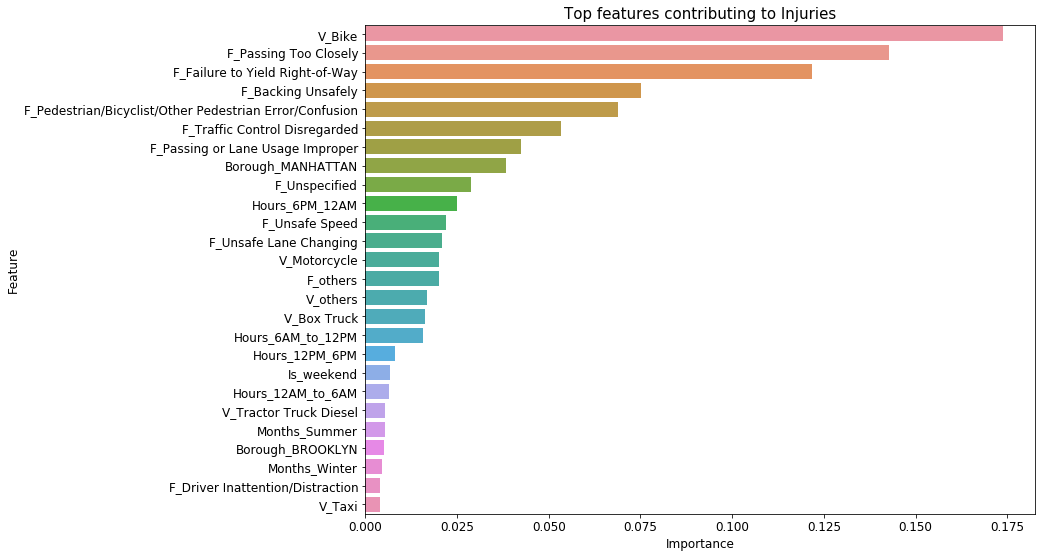

In [63]:
plt.figure(figsize=(12,9))
sns.barplot(data = feature_importance.loc[:25],x='importance', y='feature')
plt.xlabel('Importance',fontsize=12)
plt.ylabel('Feature',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top features contributing to Injuries',fontsize=15);

In [94]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred = logreg.predict(test_features)

In [96]:
print("Confusion Matrix")
print(confusion_matrix(test_labels, y_pred))
print("Classification Report")
print(classification_report(test_labels, y_pred))
print("F1 score")
print(round(f1_score(test_labels, y_pred),2))
print("ROC AUC score")
print(round(roc_auc_score(test_labels, y_pred),2))

Confusion Matrix
[[27221 12325]
 [ 5164  6050]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.69      0.76     39546
           1       0.33      0.54      0.41     11214

    accuracy                           0.66     50760
   macro avg       0.58      0.61      0.58     50760
weighted avg       0.73      0.66      0.68     50760

F1 score
0.41
ROC AUC score
0.61


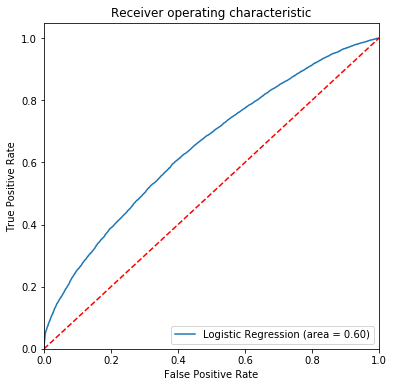

In [728]:
#Area under ROC

from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(test_labels, logreg.predict(test_features))
fpr, tpr, thresholds = roc_curve(test_labels, logreg.predict_proba(test_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

In [741]:
nyc_mv_crashes_final.groupby('crash_year').agg(agg_dict).reset_index()

,crash_year,Collision_Id,Number_Of_Persons_Injured,Number_Of_Persons_Killed,Number_Of_Cyclist_Killed,Number_Of_Pedestrians_Killed,Number_Of_Motorist_Killed
0,2013,203735,55125.0,297.0,11,176,110
1,2014,206033,51223.0,262.0,20,133,109
2,2015,217694,51358.0,243.0,15,133,95
3,2016,229814,60306.0,245.0,20,150,74
4,2017,231007,60656.0,256.0,27,127,107
5,2018,231560,61941.0,228.0,10,121,97
6,2019,210451,61040.0,242.0,28,129,85


In [739]:
agg_dict = {'Collision_Id':'count','Number_Of_Persons_Injured':'sum','Number_Of_Persons_Killed':'sum','Number_Of_Cyclist_Killed':'sum',
           'Number_Of_Pedestrians_Killed':'sum','Number_Of_Motorist_Killed':'sum'}

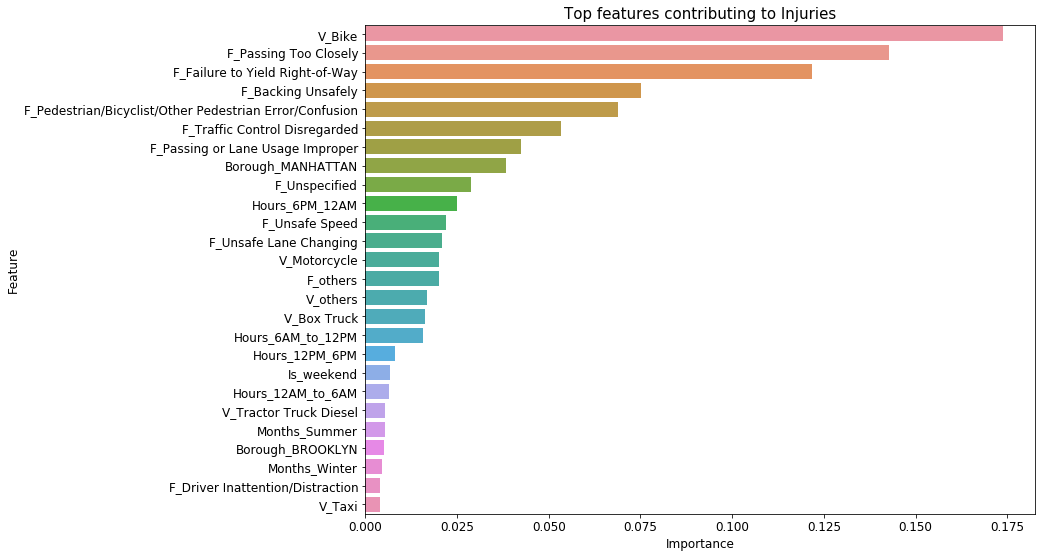

In [93]:
plt.figure(figsize=(12,9))
sns.barplot(data = feature_importance.loc[:25],x='importance', y='feature')
plt.xlabel('Importance',fontsize=12)
plt.ylabel('Feature',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top features contributing to Injuries',fontsize=15);